In [1]:
# Block 1: Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

In [2]:
# Block 2: Load and Preprocess Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize and flatten
x_train = x_train.reshape(-1, 28*28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28*28).astype('float32') / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Block 3: Build Deep Neural Network (DNN)
initializer = tf.keras.initializers.HeNormal()
model = models.Sequential()
model.add(layers.Input(shape=(784,)))

for units in [1024, 1024, 512, 512, 256, 256, 128, 64]:
    model.add(layers.Dense(units, kernel_initializer=initializer))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(0.2))

model.add(layers.Dense(10, activation='softmax'))

In [4]:
# Block 4: Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │             

 Total params: 2,894,922 (11.04 MB)

 Trainable params: 2,887,370 (11.01 MB)

 Non-trainable params: 7,552 (29.50 KB)

In [5]:
# Block 5: Callbacks for Stable Convergence
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(patience=2, factor=0.5, verbose=1)

In [8]:
# Block 6: Train the Model
history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.2,
                    #callbacks=[early_stop, reduce_lr],
                    verbose=2)

Epoch 1/30
375/375 - 35s - 92ms/step - accuracy: 0.8804 - loss: 0.3403 - val_accuracy: 0.8644 - val_loss: 0.4108
Epoch 2/30
375/375 - 37s - 99ms/step - accuracy: 0.8850 - loss: 0.3263 - val_accuracy: 0.8622 - val_loss: 0.4065
Epoch 3/30
375/375 - 42s - 111ms/step - accuracy: 0.8914 - loss: 0.3110 - val_accuracy: 0.8595 - val_loss: 0.3825
Epoch 4/30
375/375 - 39s - 105ms/step - accuracy: 0.8948 - loss: 0.2998 - val_accuracy: 0.8814 - val_loss: 0.3497
Epoch 5/30
375/375 - 30s - 81ms/step - accuracy: 0.8984 - loss: 0.2884 - val_accuracy: 0.8703 - val_loss: 0.3699
Epoch 6/30
375/375 - 41s - 110ms/step - accuracy: 0.8995 - loss: 0.2808 - val_accuracy: 0.8866 - val_loss: 0.3268
Epoch 7/30
375/375 - 30s - 80ms/step - accuracy: 0.9038 - loss: 0.2717 - val_accuracy: 0.8867 - val_loss: 0.3195
Epoch 8/30
375/375 - 42s - 111ms/step - accuracy: 0.9075 - loss: 0.2629 - val_accuracy: 0.8777 - val_loss: 0.3405
Epoch 9/30
375/375 - 30s - 81ms/step - accuracy: 0.9108 - loss: 0.2558 - val_accuracy: 0.867

In [9]:
# Block 7: Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\n Test Accuracy: {test_acc:.4f}")


 Test Accuracy: 0.8919


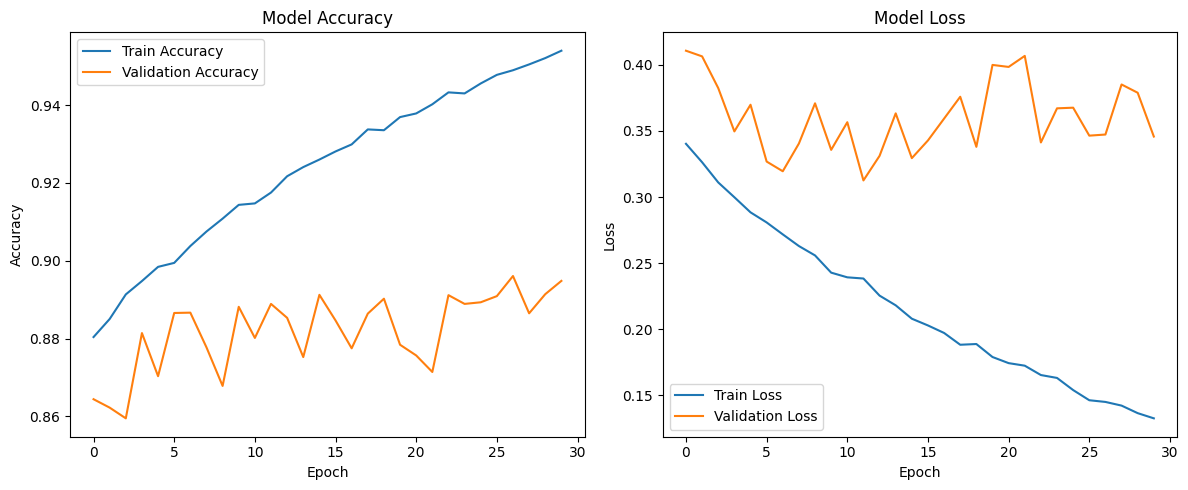

In [10]:
# Block 8: Plot Training Progress
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()